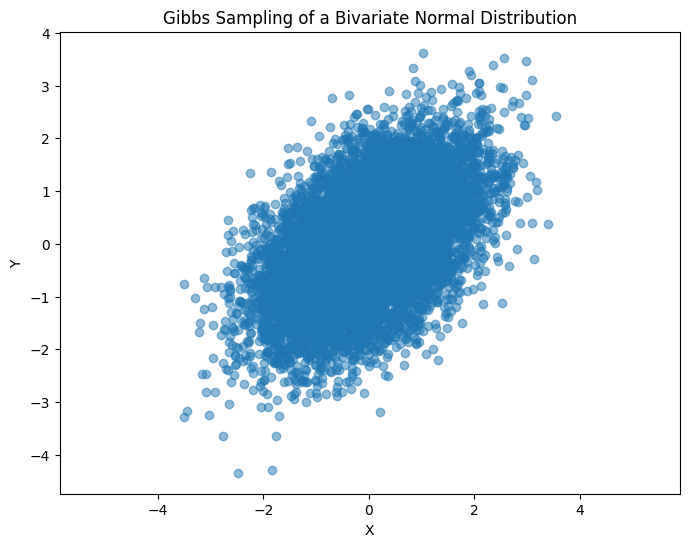

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gibbs_sampling(mu, sigma, num_samples):
    samples = np.zeros((num_samples, 2))
    x = np.random.normal(0, 1)  # Initial guess for x

    for i in range(num_samples):
        # Sample y from the conditional distribution of y | x
        y_mean = mu[1] + sigma[1, 0] / sigma[0, 0] * (x - mu[0])
        y = np.random.normal(y_mean, np.sqrt(sigma[1, 1] - sigma[1, 0]**2 / sigma[0, 0]))
        samples[i, 1] = y

        # Sample x from the conditional distribution of x | y
        x_mean = mu[0] + sigma[0, 1] / sigma[1, 1] * (y - mu[1])
        x = np.random.normal(x_mean, np.sqrt(sigma[0, 0] - sigma[0, 1]**2 / sigma[1, 1]))
        samples[i, 0] = x

    return samples

# Parameters for a bivariate normal distribution
mu = [0, 0]  # Means
sigma = np.array([[1, 0.5], [0.5, 1]])


# Generate samples
num_samples = 10000
samples = gibbs_sampling(mu, sigma, num_samples)

# Plotting and the bivariate normal distribution
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title('Gibbs Sampling of a Bivariate Normal Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()
